# Import and Basic Info

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math
import random

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # To ignore SettingWithCopyWarning warning

# Set a random seed for repeatability
rand_seed = 123
random.seed(rand_seed)
np.random.seed(rand_seed)

In [2]:
train = pd.read_csv("train.csv")
validation = pd.read_csv("validation.csv")

In [3]:
train.shape, validation.shape

((2430981, 25), (303925, 25))

In [4]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 25 columns):
click             int64
weekday           int64
hour              int64
bidid             object
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        float64
domain            object
url               object
urlid             float64
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: float64(2), int64(11), object(12)
memory usage: 463.7+ MB


In [6]:
train.head(10)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,NaN,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,NaN,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,NaN,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,NaN,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,NaN,1120200150,728,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1.0,trqRTuxoGQdcFNKbuKz,bdbc836b2f86c0391bd2f1e1e50739b3,NaN,mm_10024662_3445902_11178345,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3.0,3FKElpuEMusyJqKbuKz,6957deb8d83340086ef3cb2abd9c7198,NaN,Fashion_F_Width1,1000,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1.0,trqRTvp8gIc7gspy,4c70d1fc007d5349286f58da6d08fa9,NaN,mm_33208362_3404787_11119183,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3.0,ersbQv1RdoTy1m58uG,cbec43b96a01da4a0e06cc78d483a24f,NaN,ALLINONE_F_Width1,1000,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3.0,ersbQv1RdoTy1m58uG,1b2f87d6f3b8b473afe7e9fbe597afca,NaN,ALLINONE_F_Width1,1000,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


## Missing values

In [7]:
def MissingValues(df):
    
    """
    Function to detect null values
    """
    
    obj_cols = list(df.select_dtypes(include=['object']).columns)
    nulls_list = [df[col].str.match("null").sum()*100/df.shape[0] for col in obj_cols]
    nulls_df = pd.DataFrame(index = obj_cols, columns = ["Nulls_Percentage"], data = nulls_list)
    
    return nulls_df

def ImputeMissingValues(df):
    
    """
    As will be seen, the only column that has null values and will be actually used as a feature
    in our models is "adexchange". All other columns with null values (i.e. domain, url, urlid, keypage)
    will be ignored because they have too many values to be encoded (feature space would be enormous)
    """
    
    ### Remember to impute slot_format and slot_visibility!!!
    
    #df.loc[ df["adexchange"] == "null", "adexchange"] = df["adexchange"].dropna().mode()[0]
    df["adexchange"] = df["adexchange"].fillna(df["adexchange"].dropna().mode()[0])
    df["usertag"] = df["usertag"].fillna("")  ## not optimal
    return df


In [8]:
train.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

In [9]:
validation.isnull().sum()

click                  0
weekday                0
hour                   0
bidid                  0
userid                 0
useragent              0
IP                     0
region                 0
city                   0
adexchange          6176
domain             16932
url                10850
urlid             303925
slotid                 0
slotwidth              0
slotheight             0
slotvisibility         0
slotformat             0
slotprice              0
creative               0
bidprice               0
payprice               0
keypage            62944
advertiser             0
usertag            62186
dtype: int64

In [10]:
train_2 = ImputeMissingValues(train)
validation_2 = ImputeMissingValues(validation)

In [11]:
train_2.shape, validation_2.shape

((2430981, 25), (303925, 25))

In [12]:
train_2.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange              0
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag                 0
dtype: int64

In [13]:
validation_2.isnull().sum()

click                  0
weekday                0
hour                   0
bidid                  0
userid                 0
useragent              0
IP                     0
region                 0
city                   0
adexchange             0
domain             16932
url                10850
urlid             303925
slotid                 0
slotwidth              0
slotheight             0
slotvisibility         0
slotformat             0
slotprice              0
creative               0
bidprice               0
payprice               0
keypage            62944
advertiser             0
usertag                0
dtype: int64

## Feature Engineering

### Usertags

Because estimating the usertags is time consuming, we estimate it once before we proceed for further fearure engineering (so we don't need to recalculate usertags every time we run the Feature Engineering function)

In [14]:
def UsertagCategories(df):
    
    # Drop nan
    df = df["usertag"].dropna().reset_index(drop = True)
    
    # Find unique usertags
    usertags_list = [df[i].split(",") for i in range(df.shape[0])]
    
    # itertools.chain.from_iterable joins a list of lists into a single list
    usertags = np.unique(list(itertools.chain.from_iterable(usertags_list)))
    
    return usertags

In [15]:
usertags_train = UsertagCategories(train)
usertags_validation = UsertagCategories(validation)

In [16]:
usertags_train[0]

''

In [17]:
random.choice(usertags_train)

'10057'

In [18]:
list(set(usertags_train) - set(usertags_validation)), list(set(usertags_validation) - set(usertags_train))

([], [])

In [19]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [20]:
def DropColumns(df):
    
    columns = ["weekday", "hour", "bidid", "userid", "useragent", "IP", "domain", "url", "urlid", "slotid",
               "slotwidth", "slotheight", "slotprice", "keypage", "usertag", "region", "city", "adexchange", "advertiser"]
    df.drop(columns, axis = 1, inplace = True)
    
    return df

def GetDummies(df):
    
    df = pd.get_dummies(df)
    return df

def FeatureEngineering(df):
    
        # Convert numerical to categorical
        df["weekday_cat"] = df["weekday"].map(lambda x: str(x))
        df["hour_cat"] = df["hour"].map(lambda x: str(x))
        df["region_cat"] = df["region"].map(lambda x: str(x))
        df["city_cat"] = df["city"].map(lambda x: str(x))
        df["adexchange_cat"] = df["adexchange"].map(lambda x: str(x))
        df["advertiser_cat"] = df["advertiser"].map(lambda x: str(x))
        
        # Operating system
        df["os"] = df["useragent"].map(lambda x: x.split("_")[0])
        
        # Browser
        df["browser"] = df["useragent"].map(lambda x: x.split("_")[1])
        
        # Slotarea
        df["slotarea"] = df["slotwidth"]*df["slotheight"]   ####.astype("category")
        
        # Part of the day
        df["part_of_the_day"] = ""
        
        df.loc[(df["weekday"] == 0) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Sunday_Night"
        df.loc[(df["weekday"] == 0) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Sunday_Morning"
        df.loc[(df["weekday"] == 0) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Sunday_Evening"
        
        df.loc[(df["weekday"] == 1) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Monday_Night"
        df.loc[(df["weekday"] == 1) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Monday_Morning"
        df.loc[(df["weekday"] == 1) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Monday_Evening"

        
        df.loc[(df["weekday"] == 2) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Tuesday_Night"
        df.loc[(df["weekday"] == 2) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Tuesday_Morning"
        df.loc[(df["weekday"] == 2) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Tuesday_Evening"

        df.loc[(df["weekday"] == 3) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Wednesday_Night"
        df.loc[(df["weekday"] == 3) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Wednesday_Morning"
        df.loc[(df["weekday"] == 3) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Wednesday_Evening"

        df.loc[(df["weekday"] == 4) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Tuesday_Night"
        df.loc[(df["weekday"] == 4) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Tuesday_Morning"
        df.loc[(df["weekday"] == 4) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Tuesday_Evening"

        df.loc[(df["weekday"] == 5) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Friday_Night"
        df.loc[(df["weekday"] == 5) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Friday_Morning"
        df.loc[(df["weekday"] == 5) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Friday_Evening"

        
        df.loc[(df["weekday"] == 6) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Saturday_Night"
        df.loc[(df["weekday"] == 6) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Saturday_Morning"
        df.loc[(df["weekday"] == 6) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Saturday_Evening"
        
        # Slotprice binning
        df["slotprice_cat"] = 0
        
        df.loc[ df["slotprice"] <= 10, "slotprice_cat"] = 0
        df.loc[ (df["slotprice"] > 10) & (df["slotprice"] <= 50), "slotprice_cat"] = 1
        df.loc[ (df["slotprice"] > 50) & (df["slotprice"] <= 100), "slotprice_cat"] = 2
        df.loc[ df["slotprice"] > 100, "slotprice_cat"] = 3

        
        # Usertags
        for tag in usertags_train:
            col_name = "usertag_" + tag
            df[col_name] = df["usertag"].map(lambda x: 1 if tag in x.split(",") else 0)
        
  
        return df

### Combine train and validation sets

Before applying the feature engineering function and encode categorical variables we will concatenate tarin and validation sets. The reason to do that, is that if we encode train and validation categorical columns separately, there is the possibility that one category that exists in train data, does not exist in validation data. This situation would cause our code to crash, since train and validation sets would consist of different features. 

In [21]:
all_data = pd.concat((train_2, validation_2), axis = 0)

In [22]:
train_2.shape, validation_2.shape, all_data.shape

((2430981, 25), (303925, 25), (2734906, 25))

In [23]:
% time all_data = FeatureEngineering(all_data)

CPU times: user 2min 57s, sys: 5.39 s, total: 3min 3s
Wall time: 3min 3s


In [24]:
all_data.shape

(2734906, 105)

In [25]:
all_data = DropColumns(all_data)

In [26]:
all_data.shape

(2734906, 86)

In [27]:
all_data.columns

Index(['click', 'slotvisibility', 'slotformat', 'creative', 'bidprice',
       'payprice', 'weekday_cat', 'hour_cat', 'region_cat', 'city_cat',
       'adexchange_cat', 'advertiser_cat', 'os', 'browser', 'slotarea',
       'part_of_the_day', 'slotprice_cat', 'usertag_', 'usertag_10006',
       'usertag_10024', 'usertag_10031', 'usertag_10048', 'usertag_10052',
       'usertag_10057', 'usertag_10059', 'usertag_10063', 'usertag_10067',
       'usertag_10074', 'usertag_10075', 'usertag_10076', 'usertag_10077',
       'usertag_10079', 'usertag_10083', 'usertag_10093', 'usertag_10102',
       'usertag_10110', 'usertag_10111', 'usertag_10114', 'usertag_10115',
       'usertag_10116', 'usertag_10117', 'usertag_10118', 'usertag_10120',
       'usertag_10123', 'usertag_10125', 'usertag_10126', 'usertag_10127',
       'usertag_10129', 'usertag_10130', 'usertag_10131', 'usertag_10133',
       'usertag_10138', 'usertag_10140', 'usertag_10142', 'usertag_10145',
       'usertag_10146', 'usertag_1014

In [28]:
all_data_dummy = GetDummies(all_data)

In [29]:
c = all_data_dummy.columns
c

Index(['click', 'bidprice', 'payprice', 'slotarea', 'slotprice_cat',
       'usertag_', 'usertag_10006', 'usertag_10024', 'usertag_10031',
       'usertag_10048',
       ...
       'part_of_the_day_Saturday_Night', 'part_of_the_day_Sunday_Evening',
       'part_of_the_day_Sunday_Morning', 'part_of_the_day_Sunday_Night',
       'part_of_the_day_Tuesday_Evening', 'part_of_the_day_Tuesday_Morning',
       'part_of_the_day_Tuesday_Night', 'part_of_the_day_Wednesday_Evening',
       'part_of_the_day_Wednesday_Morning', 'part_of_the_day_Wednesday_Night'],
      dtype='object', length=702)

In [30]:
all_data_dummy.head()

,click,bidprice,payprice,slotarea,slotprice_cat,usertag_,usertag_10006,usertag_10024,usertag_10031,usertag_10048,usertag_10052,usertag_10057,usertag_10059,usertag_10063,usertag_10067,usertag_10074,usertag_10075,usertag_10076,usertag_10077,usertag_10079,usertag_10083,usertag_10093,usertag_10102,usertag_10110,usertag_10111,usertag_10114,usertag_10115,usertag_10116,usertag_10117,usertag_10118,usertag_10120,usertag_10123,usertag_10125,usertag_10126,usertag_10127,usertag_10129,usertag_10130,usertag_10131,usertag_10133,usertag_10138,usertag_10140,usertag_10142,usertag_10145,usertag_10146,usertag_10147,usertag_10148,usertag_10149,usertag_10684,usertag_11092,usertag_11278,usertag_11379,usertag_11423,usertag_11512,usertag_11576,usertag_11632,usertag_11680,usertag_11724,usertag_11944,usertag_13042,usertag_13403,usertag_13496,usertag_13678,usertag_13776,usertag_13800,usertag_13866,usertag_13874,usertag_14273,usertag_15398,usertag_16593,usertag_16617,usertag_16661,usertag_16706,usertag_16751,usertag_16753,slotvisibility_0,slotvisibility_1,slotvisibility_2,slotvisibility_255,slotvisibility_FifthView,slotvisibility_FirstView,slotvisibility_FourthView,slotvisibility_Na,slotvisibility_OtherView,slotvisibility_SecondView,slotvisibility_ThirdView,slotformat_0,slotformat_1,slotformat_5,slotformat_Na,creative_0055e8503dc053435b3599fe44af118b,creative_00fccc64a1ee2809348509b7ac2a97a5,creative_011c1a3d4d3f089a54f9b70a4c0a6eb3,creative_0cd33fcb336655841d3e1441b915748d,creative_10717,creative_10718,creative_10719,creative_10720,creative_10721,creative_10722,creative_10723,creative_10733,creative_10734,creative_11908,creative_12610,creative_12611,creative_12612,creative_12613,creative_12614,creative_12615,creative_12616,creative_12618,creative_12619,creative_12620,creative_12621,creative_12622,creative_12623,creative_12624,creative_12625,creative_12626,creative_12627,creative_12628,creative_12629,creative_12630,creative_12631,creative_12632,creative_12633,creative_12782,creative_12987,creative_13606a7c541dcd9ca1948875a760bb31,creative_16ff51916f0c796ec72eefc633c4a8ed,creative_1a43f1ff53f48573803d4a3c31ebc163,creative_23485fcd23122d755d38f8c89d46ca56,creative_23d6dade7ed21cea308205b37594003e,creative_266f17dcc3a2280172a48fec62be7d02,creative_2abc9eaf57d17a96195af3f63c45dc72,creative_2f88fc9cf0141b5bbaf251cab07f4ce7,creative_3b805a00d99d5ee2493c8fb0063e30e9,creative_3d8f1161832704a1a34e1ccdda11a81e,creative_4400bf8dea968a0068824792fd336c4c,creative_44966cc8da1ed40c95d59e863c8c75f0,creative_449a22cd91d9042eda3d3a1b89a22ea8,creative_47905feeb59223468fb898b3c9ac024d,creative_48c6405fa5bdecc850ea6ef5e6cf4da5,creative_48f2e9ba15708c0146bda5e1dd653caa,creative_4ad7e35171a3d8de73bb862791575f2e,creative_4b724cd63dfb905ebcd54e64572c646d,creative_54c6e2569e059cf336f7e7742b44c3ba,creative_59f065a795a663140e36eec106464524,creative_5c4e0bb0db45e2d1b3a14f817196ebd6,creative_612599432d200b093719dd1f372f7a30,creative_62f7f9a6dca2f80cc00f17dcda730bc1,creative_6455a6f45433aef94075f34dafd8d3bf,creative_672fd361820651d4d99b47d7bf48d715,creative_6b9331e0f0dbbfef42c308333681f0a3,creative_6cdf8fdd3e01122b09b5b411510a2385,creative_6fb071c11134e5078c1184ef1370a110,creative_7097e4210dea4d69f07f0f5e4343529c,creative_7184c9560e68e977187e67e45a4f3198,creative_7314,creative_7315,creative_7316,creative_7317,creative_7318,creative_7319,creative_7320,creative_7321,creative_7322,creative_7323,creative_7324,creative_7325,creative_7326,creative_7327,creative_7328,creative_7330,creative_7331,creative_7332,creative_7333,creative_7334,creative_7335,creative_7336,creative_77819d3e0b3467fe5c7b16d68ad923a1,creative_798b2d49952d77f1eace9f23c210d0b5,creative_7eb0065067225fa5f511f7ffb9895f24,creative_80446133fda50388678789e3ebd9fdb1,creative_80a776343079ed94d424f4607b35fd39,creative_82f125e356439d73902ae85e2be96777,creative_832b91d59d0cb5731431653204a76c0e,creative_86c2543527c86a893d4d4f68810a0416,creative_87945ed58e806dbdc291b3662f581354,creative_8dff45ed862a740986dbe688aafee7e5,creative_911b2d84

### Split back to train and validation

In [31]:
train_dummy = all_data_dummy[:train_2.shape[0]]
validation_dummy = all_data_dummy[train_2.shape[0]:]

In [32]:
train_dummy.shape, validation_dummy.shape

((2430981, 702), (303925, 702))

In [33]:
train_dummy.head()

,click,bidprice,payprice,slotarea,slotprice_cat,usertag_,usertag_10006,usertag_10024,usertag_10031,usertag_10048,usertag_10052,usertag_10057,usertag_10059,usertag_10063,usertag_10067,usertag_10074,usertag_10075,usertag_10076,usertag_10077,usertag_10079,usertag_10083,usertag_10093,usertag_10102,usertag_10110,usertag_10111,usertag_10114,usertag_10115,usertag_10116,usertag_10117,usertag_10118,usertag_10120,usertag_10123,usertag_10125,usertag_10126,usertag_10127,usertag_10129,usertag_10130,usertag_10131,usertag_10133,usertag_10138,usertag_10140,usertag_10142,usertag_10145,usertag_10146,usertag_10147,usertag_10148,usertag_10149,usertag_10684,usertag_11092,usertag_11278,usertag_11379,usertag_11423,usertag_11512,usertag_11576,usertag_11632,usertag_11680,usertag_11724,usertag_11944,usertag_13042,usertag_13403,usertag_13496,usertag_13678,usertag_13776,usertag_13800,usertag_13866,usertag_13874,usertag_14273,usertag_15398,usertag_16593,usertag_16617,usertag_16661,usertag_16706,usertag_16751,usertag_16753,slotvisibility_0,slotvisibility_1,slotvisibility_2,slotvisibility_255,slotvisibility_FifthView,slotvisibility_FirstView,slotvisibility_FourthView,slotvisibility_Na,slotvisibility_OtherView,slotvisibility_SecondView,slotvisibility_ThirdView,slotformat_0,slotformat_1,slotformat_5,slotformat_Na,creative_0055e8503dc053435b3599fe44af118b,creative_00fccc64a1ee2809348509b7ac2a97a5,creative_011c1a3d4d3f089a54f9b70a4c0a6eb3,creative_0cd33fcb336655841d3e1441b915748d,creative_10717,creative_10718,creative_10719,creative_10720,creative_10721,creative_10722,creative_10723,creative_10733,creative_10734,creative_11908,creative_12610,creative_12611,creative_12612,creative_12613,creative_12614,creative_12615,creative_12616,creative_12618,creative_12619,creative_12620,creative_12621,creative_12622,creative_12623,creative_12624,creative_12625,creative_12626,creative_12627,creative_12628,creative_12629,creative_12630,creative_12631,creative_12632,creative_12633,creative_12782,creative_12987,creative_13606a7c541dcd9ca1948875a760bb31,creative_16ff51916f0c796ec72eefc633c4a8ed,creative_1a43f1ff53f48573803d4a3c31ebc163,creative_23485fcd23122d755d38f8c89d46ca56,creative_23d6dade7ed21cea308205b37594003e,creative_266f17dcc3a2280172a48fec62be7d02,creative_2abc9eaf57d17a96195af3f63c45dc72,creative_2f88fc9cf0141b5bbaf251cab07f4ce7,creative_3b805a00d99d5ee2493c8fb0063e30e9,creative_3d8f1161832704a1a34e1ccdda11a81e,creative_4400bf8dea968a0068824792fd336c4c,creative_44966cc8da1ed40c95d59e863c8c75f0,creative_449a22cd91d9042eda3d3a1b89a22ea8,creative_47905feeb59223468fb898b3c9ac024d,creative_48c6405fa5bdecc850ea6ef5e6cf4da5,creative_48f2e9ba15708c0146bda5e1dd653caa,creative_4ad7e35171a3d8de73bb862791575f2e,creative_4b724cd63dfb905ebcd54e64572c646d,creative_54c6e2569e059cf336f7e7742b44c3ba,creative_59f065a795a663140e36eec106464524,creative_5c4e0bb0db45e2d1b3a14f817196ebd6,creative_612599432d200b093719dd1f372f7a30,creative_62f7f9a6dca2f80cc00f17dcda730bc1,creative_6455a6f45433aef94075f34dafd8d3bf,creative_672fd361820651d4d99b47d7bf48d715,creative_6b9331e0f0dbbfef42c308333681f0a3,creative_6cdf8fdd3e01122b09b5b411510a2385,creative_6fb071c11134e5078c1184ef1370a110,creative_7097e4210dea4d69f07f0f5e4343529c,creative_7184c9560e68e977187e67e45a4f3198,creative_7314,creative_7315,creative_7316,creative_7317,creative_7318,creative_7319,creative_7320,creative_7321,creative_7322,creative_7323,creative_7324,creative_7325,creative_7326,creative_7327,creative_7328,creative_7330,creative_7331,creative_7332,creative_7333,creative_7334,creative_7335,creative_7336,creative_77819d3e0b3467fe5c7b16d68ad923a1,creative_798b2d49952d77f1eace9f23c210d0b5,creative_7eb0065067225fa5f511f7ffb9895f24,creative_80446133fda50388678789e3ebd9fdb1,creative_80a776343079ed94d424f4607b35fd39,creative_82f125e356439d73902ae85e2be96777,creative_832b91d59d0cb5731431653204a76c0e,creative_86c2543527c86a893d4d4f68810a0416,creative_87945ed58e806dbdc291b3662f581354,creative_8dff45ed862a740986dbe688aafee7e5,creative_911b2d84

In [34]:
train_dummy.columns

Index(['click', 'bidprice', 'payprice', 'slotarea', 'slotprice_cat',
       'usertag_', 'usertag_10006', 'usertag_10024', 'usertag_10031',
       'usertag_10048',
       ...
       'part_of_the_day_Saturday_Night', 'part_of_the_day_Sunday_Evening',
       'part_of_the_day_Sunday_Morning', 'part_of_the_day_Sunday_Night',
       'part_of_the_day_Tuesday_Evening', 'part_of_the_day_Tuesday_Morning',
       'part_of_the_day_Tuesday_Night', 'part_of_the_day_Wednesday_Evening',
       'part_of_the_day_Wednesday_Morning', 'part_of_the_day_Wednesday_Night'],
      dtype='object', length=702)

In [35]:
train_dummy.drop(["bidprice", "payprice"], axis = 1, inplace = True)

In [36]:
train_dummy.head()

,click,slotarea,slotprice_cat,usertag_,usertag_10006,usertag_10024,usertag_10031,usertag_10048,usertag_10052,usertag_10057,usertag_10059,usertag_10063,usertag_10067,usertag_10074,usertag_10075,usertag_10076,usertag_10077,usertag_10079,usertag_10083,usertag_10093,usertag_10102,usertag_10110,usertag_10111,usertag_10114,usertag_10115,usertag_10116,usertag_10117,usertag_10118,usertag_10120,usertag_10123,usertag_10125,usertag_10126,usertag_10127,usertag_10129,usertag_10130,usertag_10131,usertag_10133,usertag_10138,usertag_10140,usertag_10142,usertag_10145,usertag_10146,usertag_10147,usertag_10148,usertag_10149,usertag_10684,usertag_11092,usertag_11278,usertag_11379,usertag_11423,usertag_11512,usertag_11576,usertag_11632,usertag_11680,usertag_11724,usertag_11944,usertag_13042,usertag_13403,usertag_13496,usertag_13678,usertag_13776,usertag_13800,usertag_13866,usertag_13874,usertag_14273,usertag_15398,usertag_16593,usertag_16617,usertag_16661,usertag_16706,usertag_16751,usertag_16753,slotvisibility_0,slotvisibility_1,slotvisibility_2,slotvisibility_255,slotvisibility_FifthView,slotvisibility_FirstView,slotvisibility_FourthView,slotvisibility_Na,slotvisibility_OtherView,slotvisibility_SecondView,slotvisibility_ThirdView,slotformat_0,slotformat_1,slotformat_5,slotformat_Na,creative_0055e8503dc053435b3599fe44af118b,creative_00fccc64a1ee2809348509b7ac2a97a5,creative_011c1a3d4d3f089a54f9b70a4c0a6eb3,creative_0cd33fcb336655841d3e1441b915748d,creative_10717,creative_10718,creative_10719,creative_10720,creative_10721,creative_10722,creative_10723,creative_10733,creative_10734,creative_11908,creative_12610,creative_12611,creative_12612,creative_12613,creative_12614,creative_12615,creative_12616,creative_12618,creative_12619,creative_12620,creative_12621,creative_12622,creative_12623,creative_12624,creative_12625,creative_12626,creative_12627,creative_12628,creative_12629,creative_12630,creative_12631,creative_12632,creative_12633,creative_12782,creative_12987,creative_13606a7c541dcd9ca1948875a760bb31,creative_16ff51916f0c796ec72eefc633c4a8ed,creative_1a43f1ff53f48573803d4a3c31ebc163,creative_23485fcd23122d755d38f8c89d46ca56,creative_23d6dade7ed21cea308205b37594003e,creative_266f17dcc3a2280172a48fec62be7d02,creative_2abc9eaf57d17a96195af3f63c45dc72,creative_2f88fc9cf0141b5bbaf251cab07f4ce7,creative_3b805a00d99d5ee2493c8fb0063e30e9,creative_3d8f1161832704a1a34e1ccdda11a81e,creative_4400bf8dea968a0068824792fd336c4c,creative_44966cc8da1ed40c95d59e863c8c75f0,creative_449a22cd91d9042eda3d3a1b89a22ea8,creative_47905feeb59223468fb898b3c9ac024d,creative_48c6405fa5bdecc850ea6ef5e6cf4da5,creative_48f2e9ba15708c0146bda5e1dd653caa,creative_4ad7e35171a3d8de73bb862791575f2e,creative_4b724cd63dfb905ebcd54e64572c646d,creative_54c6e2569e059cf336f7e7742b44c3ba,creative_59f065a795a663140e36eec106464524,creative_5c4e0bb0db45e2d1b3a14f817196ebd6,creative_612599432d200b093719dd1f372f7a30,creative_62f7f9a6dca2f80cc00f17dcda730bc1,creative_6455a6f45433aef94075f34dafd8d3bf,creative_672fd361820651d4d99b47d7bf48d715,creative_6b9331e0f0dbbfef42c308333681f0a3,creative_6cdf8fdd3e01122b09b5b411510a2385,creative_6fb071c11134e5078c1184ef1370a110,creative_7097e4210dea4d69f07f0f5e4343529c,creative_7184c9560e68e977187e67e45a4f3198,creative_7314,creative_7315,creative_7316,creative_7317,creative_7318,creative_7319,creative_7320,creative_7321,creative_7322,creative_7323,creative_7324,creative_7325,creative_7326,creative_7327,creative_7328,creative_7330,creative_7331,creative_7332,creative_7333,creative_7334,creative_7335,creative_7336,creative_77819d3e0b3467fe5c7b16d68ad923a1,creative_798b2d49952d77f1eace9f23c210d0b5,creative_7eb0065067225fa5f511f7ffb9895f24,creative_80446133fda50388678789e3ebd9fdb1,creative_80a776343079ed94d424f4607b35fd39,creative_82f125e356439d73902ae85e2be96777,creative_832b91d59d0cb5731431653204a76c0e,creative_86c2543527c86a893d4d4f68810a0416,creative_87945ed58e806dbdc291b3662f581354,creative_8dff45ed862a740986dbe688aafee7e5,creative_911b2d84826786018761e8c0b0

## Target variables

In [37]:
train["click"].value_counts()

0    2429188
1       1793
Name: click, dtype: int64

In [38]:
train["click"].value_counts()*100/train.shape[0]

0    99.926244
1     0.073756
Name: click, dtype: float64

In [39]:
validation["click"].value_counts()

0    303723
1       202
Name: click, dtype: int64

In [40]:
validation["click"].value_counts()*100/validation.shape[0]

0    99.933536
1     0.066464
Name: click, dtype: float64

Text(0.5,0,'Click')

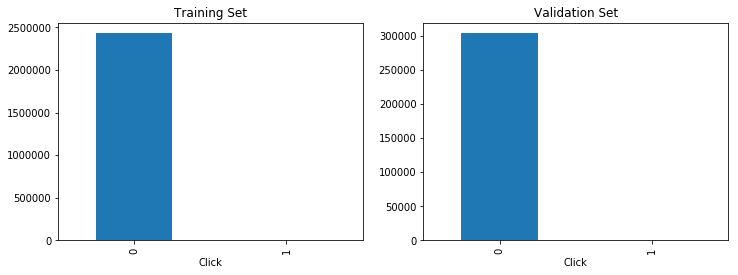

In [41]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
train["click"].value_counts().plot(kind = "bar", title = "Training Set")
plt.xlabel("Click")

plt.subplot(1,2,2)
validation["click"].value_counts().plot(kind = "bar", title = "Validation Set")
plt.xlabel("Click")

## Downsample Training Set

It is obvious that we have to deal with extremely imbalanced datasets. In the training set, the "negative" class (e.g. impressions) corresponds to 99.92% of total data-points and "positive" class corresponds to 0.08%. In absolute values, we have 2429188 impressions and only 1793 clicks. That means that we have a class-imbalance ratio in the order of 1:1000. For more information on the class imbalance problem, check [here](http://www.ele.uri.edu/faculty/he/PDFfiles/ImbalancedLearning.pdf). 

In [42]:
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [43]:
train_dummy_outliers = train_dummy.loc[train_dummy["click"] == 1]
train_dummy_inliers = train_dummy.loc[train_dummy["click"] == 0].sample(n = 20000, random_state = rand_seed).reset_index(drop = True)

In [44]:
train_dummy_inliers.shape, train_dummy_outliers.shape

((20000, 700), (1793, 700))

In [45]:
train_dummy_2 = pd.concat([train_dummy_inliers, train_dummy_outliers], axis = 0)

In [46]:
train_dummy_2.shape

(21793, 700)

In [47]:
X = train_dummy_2.loc[:, train_dummy_2.columns != "click"].values
y = train_dummy_2["click"].values

X_validation = validation_dummy.loc[:, ((validation_dummy.columns != "click") & 
                                        (validation_dummy.columns != "payprice") & 
                                        (validation_dummy.columns != "bidprice"))]
y_validation = validation_dummy["click"]

In [48]:
X.shape, y.shape, X_validation.shape, y_validation.shape

((21793, 699), (21793,), (303925, 699), (303925,))

In [49]:
clicks = train.loc[train["click"] == 1].shape[0]
impressions = train.loc[train["click"] == 0].shape[0]

In [50]:
# Random undersampling
# tl = RandomUnderSampler(ratio = dict({0: 20000, 1: clicks}), random_state = rand_seed, replacement = True)
# #% time X_down, y_down = tl.fit_sample(train_dummy.loc[:, train_dummy.columns != "click"], train_dummy["click"])
# % time X_down, y_down = tl.fit_sample(X,y)

# SMOTE oversampling
sm = SMOTE(ratio = dict({0: train_dummy_inliers.shape[0], 1: train_dummy_inliers.shape[0]}), random_state = rand_seed)
% time X_resampled, y_resampled = sm.fit_sample(X, y)

CPU times: user 1.49 s, sys: 252 ms, total: 1.74 s
Wall time: 1.74 s


In [51]:
X_resampled.shape, y_resampled.shape

((40000, 699), (40000,))

In [52]:
y_resampled.sum()

20000

## Feature Selection 

In [53]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, OneClassSVM
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score, \
                            precision_score, make_scorer
from sklearn.externals import joblib

### Recursive Feature Elimination

In [54]:
clf_name = ["Logistic Regression", "Random Forest"]
features_selected =  dict.fromkeys(clf_name)
features_selected["Logistic Regression"] = joblib.load("LR-Features.pkl")
features_selected["Random Forest"] = joblib.load("RF-Features.pkl")

## Training - Base Models

In [55]:
def FitAndEvaluateClassifier(estimator, features):
    
    # Data preparation
    X_train = pd.DataFrame(columns = train_dummy.loc[:, train_dummy.columns != "click"].columns, data = X_resampled)[features]
    y_train = y_resampled
    
    X_val = X_validation[features]
    y_val = y_validation
    
    # Fit classifier to training data
    % time estimator.fit(X_train, y_train)
    
    # Predict on validation set
    preds = estimator.predict(X_val)
    
    # Predicted probabilities
    pred_proba = estimator.predict_proba(X_val)
    pred_proba_click = [p[1] for p in pred_proba]
    
    # Evaluate performance
    print("\n")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, preds))
    print("\n")
    
    # The most important measure is TP/FP rate for the clicked class
    kpi = precision_score(y_val, preds)*100
    print("Click Precision: {}".format(kpi))
    
    # Store probabilities
    submission = pd.DataFrame(data = list(zip(validation["bidid"], pred_proba_click)),
                               columns = ["bidid", "click_proba"])
    
    #submission.to_csv(lr.__doc__.split("(")[0][:-1] + ".csv")
    
    return kpi, submission
    
    
    
def plot_confusion_matrix(y_val, preds):
    ax = plt.subplot()
    sns.heatmap(confusion_matrix(y_val, preds), annot = True, cmap = "copper", fmt = "g")
    ax.xaxis.set_ticklabels(['Impression', 'Click'])
    ax.yaxis.set_ticklabels(['Impression', 'Click'])
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title("Confusion Matrix")
    
#features = sorted(train_dummy.columns[np.where(rfecv.ranking_ == 1)])

### XGBoost

In [56]:
xgb_res, xgb_sub = FitAndEvaluateClassifier(XGBClassifier(n_estimators = 1000, random_state = rand_seed), 
                                            features_selected["Random Forest"])

CPU times: user 5min 2s, sys: 208 ms, total: 5min 3s
Wall time: 5min 3s


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:




Confusion Matrix:
[[301363   2360]
 [   114     88]]


Click Precision: 3.594771241830065


### Hyperparameter Tuning

In [57]:
# xgb_grid = {"n_estimators": [300, 500, 1000],
#             "max_depth": [5,8,15],
#             "learning_rate": [0.01, 0.1, 0.2]}

xgb_grid = {"n_estimators": [500, 1000],
            "max_depth": [8,15],
            "learning_rate": [0.01, 0.1]}

In [58]:
def TuneHyperparameters(estimator, grid, features, name_store):
    
    # Prepare data
    X_train = pd.DataFrame(columns = train_dummy.loc[:, train_dummy.columns != "click"].columns, data = X_resampled)[features]
    y_train = y_resampled
    
    X_val = X_validation[features]
    y_val = y_validation 


    # Define grid
    grid = GridSearchCV(estimator, 
                        param_grid = grid, 
                        scoring = "precision", 
                        cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = rand_seed)
                        )

    # Fit grid on train data
    % time grid.fit(X_train, y_train)

    # Store best model
    best_model = grid.best_estimator_
    joblib.dump(best_model, name_store) 
    print("Best parameters: {}".format(grid.best_params_))

    # Predict on validation set
    preds = grid.predict(X_val)
    
    # Predicted probabilities
    pred_proba = grid.predict_proba(X_val)
    pred_proba_click = [p[1] for p in pred_proba]
    
    # Evaluate performance
    print("\n")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, preds))
    print("\n")
    
    # The most important measure is TP/FP rate for the clicked class
    kpi = precision_score(y_val, preds)*100
    print("Click Precision: {}".format(kpi))
    
    # Store probabilities
    submission = pd.DataFrame(data = list(zip(validation["bidid"], pred_proba_click)),
                               columns = ["bidid", "click_proba"])
    
    return kpi, submission

### XGBoost Tuned

In [59]:
xgb_res_tuned, xgb_sub_tuned = TuneHyperparameters(XGBClassifier(random_state = rand_seed),
                                                   xgb_grid,
                                                   features_selected["Random Forest"],
                                                   "XGBoost-BestModel.pkl")

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

CPU times: user 4h 13min 7s, sys: 9.96 s, total: 4h 13min 17s
Wall time: 4h 13min 41s
Best parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500}


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:




Confusion Matrix:
[[301221   2502]
 [   115     87]]


Click Precision: 3.360370799536501


In [60]:
print("Done")

Done


Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

Remember that we use paramter C as our regularization parameter. Parameter C = 1/λ.
Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.
Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.